# Census Income Project


## Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

## Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.A single cell estimate of the population 16+ for each state.

2.Controls for Hispanic Origin by age and sex.

3.Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [426]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [427]:
df = pd.read_csv("census_income.csv")

In [428]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Exploratory Data Analysis(EDA)


In [429]:
df.shape

(32560, 15)

In [430]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

* no missing value in any columns

In [431]:
# For getting the overview summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [432]:
# value  count of all the columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

In [433]:
#calculate
#32560 - 29849

(29849/32560)*100

91.67383292383292

In [434]:
31041/32560*100

95.33476658476658

* we can see '?' in Workclass,Native_country,Occupation 

So we will fill with the mode of the columns


In [435]:
df['Workclass'] = df.Workclass.str.replace('?',str(df['Workclass'].mode()))
df['Occupation'] = df.Occupation.str.replace('?', str(df['Occupation'].mode()))
df['Native_country'] = df.Native_country.str.replace('?', str(df['Native_country'].mode()))

In [436]:
#Rechecking for '?' values
for i in df[['Workclass', 'Occupation', 'Native_country']]:
    print(df[i].value_counts())
    print("\n")

 Private                         22696
 Self-emp-not-inc                 2541
 Local-gov                        2093
 0     Private\ndtype: object     1836
 State-gov                        1297
 Self-emp-inc                     1116
 Federal-gov                       960
 Without-pay                        14
 Never-worked                        7
Name: Workclass, dtype: int64


 Prof-specialty                         4140
 Craft-repair                           4099
 Exec-managerial                        4066
 Adm-clerical                           3769
 Sales                                  3650
 Other-service                          3295
 Machine-op-inspct                      2002
 0     Prof-specialty\ndtype: object    1843
 Transport-moving                       1597
 Handlers-cleaners                      1370
 Farming-fishing                         994
 Tech-support                            928
 Protective-serv                         649
 Priv-house-serv                

Now we can see there is no '?' sign

In [437]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The mean is greater than the median(50%)in some columns which means they are skewed to the right.

The mean and the median(50%) are almost equal in Education_num and Hours_per_week which means the data is symmetric in these columns hence the data is normal and no skewness present here.

There is a huge difference in 75% amd max it shows that huge outliers are present in the columns.

In [439]:
df['Capital_loss'].nunique()

92

In [440]:
data = df.copy()

In [441]:
df['Capital_gain'].value_counts(normalize=True) * 100


0        91.673833
15024     1.065725
7688      0.872236
7298      0.755528
99999     0.488329
           ...    
1111      0.003071
2538      0.003071
22040     0.003071
4931      0.003071
5060      0.003071
Name: Capital_gain, Length: 119, dtype: float64

In [442]:
df['Capital_loss'].value_counts(normalize=True) * 100


0       95.334767
1902     0.620393
1977     0.515971
1887     0.488329
1848     0.156634
          ...    
2080     0.003071
1539     0.003071
1844     0.003071
2489     0.003071
1411     0.003071
Name: Capital_loss, Length: 92, dtype: float64

In [443]:
df.shape

(32560, 15)

# checking and removing the duplicate rows

In [444]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups].shape)

True
(24, 15)


In [445]:
# checking the duplicates
df.drop_duplicates(inplace=True)

In [446]:
df.shape

(32536, 15)

In [447]:
df.skew()

Age                0.557657
Fnlwgt             1.447695
Education_num     -0.309454
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
dtype: float64

## Distribution Of Data(Skewness Visualization)


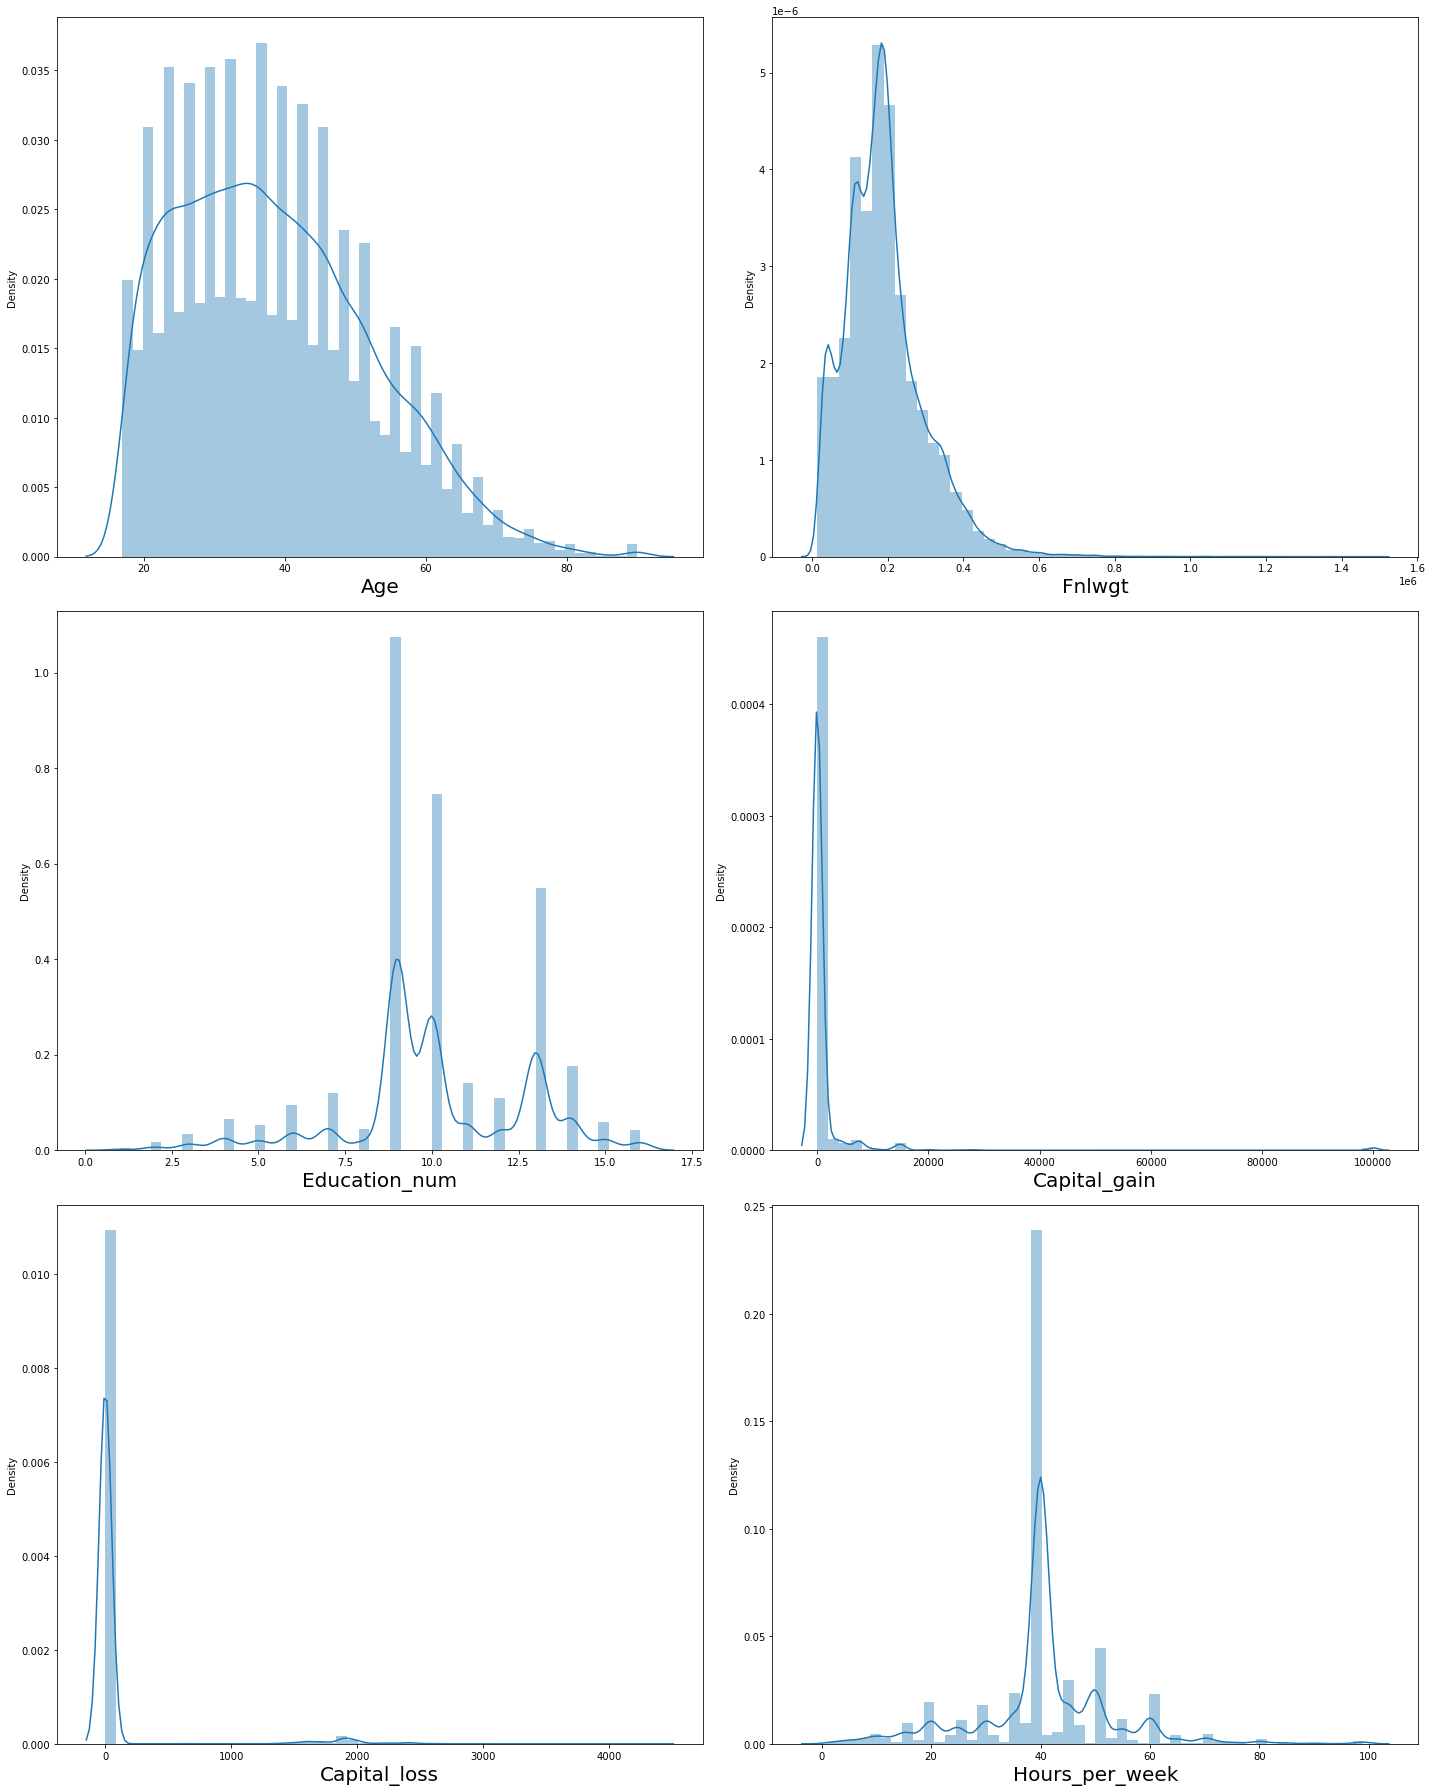

In [448]:
# Checking the distribution of data in each numeric column

plt.figure(figsize = (20, 25), facecolor = "white")
plotnumber = 1

for col in numerical_col:
    if plotnumber<=6:
        ax = plt.subplot(3, 2, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 20)
    plotnumber+=1
plt.tight_layout()

* Age is skewed right slightly
* Fnlwgt,Capital_loss and Capital_gain is very skewed to right
* Education_num and Hours_per_week is also skewed

## Checking for outliers

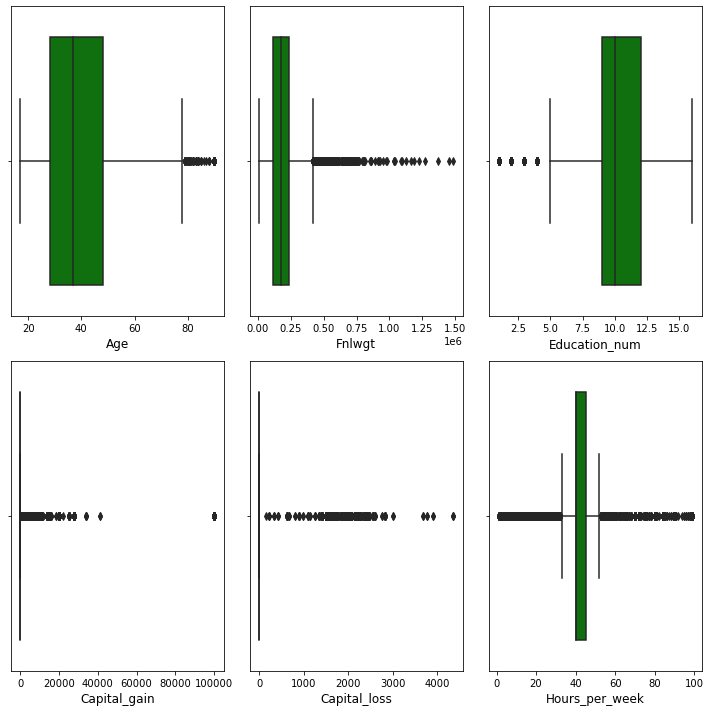

In [449]:
# Visualizing the outliers present in the numerical columns

plt.figure(figsize = (10, 10), facecolor = "white")
plotnumber = 1

for col in numerical_col:
    if plotnumber<=6:
        ax = plt.subplot(2, 3, plotnumber)
        sns.boxplot(df[col], color = 'g')
        plt.xlabel(col, fontsize = 12)
    plotnumber+=1
plt.tight_layout()

# Removing outliers using zscore


In [450]:
# Removing outliers using zscore
from scipy.stats import zscore
col = df[["Age", "Fnlwgt", "Education_num","Capital_gain","Capital_loss","Hours_per_week"]]
z = np.abs(zscore(col))
z

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.836961,1.008703,1.134817,0.145969,0.216747,2.222450
1,0.042934,0.245008,0.420646,0.145969,0.216747,0.035664
2,1.056935,0.425720,1.198377,0.145969,0.216747,0.035664
3,0.776180,1.408036,1.134817,0.145969,0.216747,0.035664
4,0.116259,0.898091,1.523683,0.145969,0.216747,0.035664
...,...,...,...,...,...,...
32555,0.849505,0.639647,0.745951,0.145969,0.216747,0.197648
32556,0.103715,0.335469,0.420646,0.145969,0.216747,0.035664
32557,1.423558,0.358812,0.420646,0.145969,0.216747,0.035664
32558,1.216128,0.110897,0.420646,0.145969,0.216747,1.655506


In [451]:
# Creating new dataframe
new_df = df[(z<3).all(axis = 1)]
new_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [452]:
new_df.shape

(29808, 15)

In [453]:
(32536 - 29808)/32536*100

8.384558642734202

Here we are losing only 8.3% data. Lets check with IQR technique.



## IQR(Inter Quartile Range)


In [454]:
# Removing outliers using IQR
Q1 = col.quantile(0.25)

Q3 = col.quantile(0.75)

#IQR
IQR = Q3-Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [455]:
df1.shape

(18983, 15)

In [456]:
(32536 - 18983)/32536*100

41.65539709859847

Using IQR methos, data loss is 41.65%. As it is more than 10%, we will consider Zscore method

In [457]:
new_df.skew()


Age                0.491125
Fnlwgt             0.635160
Education_num     -0.169811
Capital_gain       4.941892
Capital_loss      29.651762
Hours_per_week    -0.353124
dtype: float64

In [458]:
# Removing skewness using cube root method
new_df["Capital_loss"] = np.cbrt(df['Capital_loss'])
new_df.skew()

Age                0.491125
Fnlwgt             0.635160
Education_num     -0.169811
Capital_gain       4.941892
Capital_loss      25.757548
Hours_per_week    -0.353124
dtype: float64

## separating numerical and categorical columns

In [459]:
numerical_col = new_df.select_dtypes(include=[np.number])
categorical_col = new_df.select_dtypes(exclude=[np.number])

In [460]:
# Using power_transform function to remove skewness from the dataset.
from sklearn.preprocessing import power_transform

df_new = power_transform(numerical_col)
df_new = pd.DataFrame(df_new, columns = numerical_col.columns)

df_new.skew()

Age               -0.017077
Fnlwgt            -0.034773
Education_num      0.023046
Capital_gain       3.072803
Capital_loss      24.860889
Hours_per_week     0.107978
dtype: float64

In [461]:
df_new

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.928278,-1.114017,1.209860,-0.296786,-0.040161,-2.217845
1,0.130080,0.425181,-0.465077,-0.296786,-0.040161,-0.036646
2,1.103227,0.605059,-1.249334,-0.296786,-0.040161,-0.036646
3,-0.709117,1.484239,1.209860,-0.296786,-0.040161,-0.036646
4,0.054756,1.046089,1.647550,-0.296786,-0.040161,-0.036646
...,...,...,...,...,...,...
29803,-0.805675,0.809600,0.779300,-0.296786,-0.040161,-0.219695
29804,0.276064,-0.208509,-0.465077,-0.296786,-0.040161,-0.036646
29805,1.377736,-0.236198,-0.465077,-0.296786,-0.040161,-0.036646
29806,-1.336144,0.286958,-0.465077,-0.296786,-0.040161,-1.722211


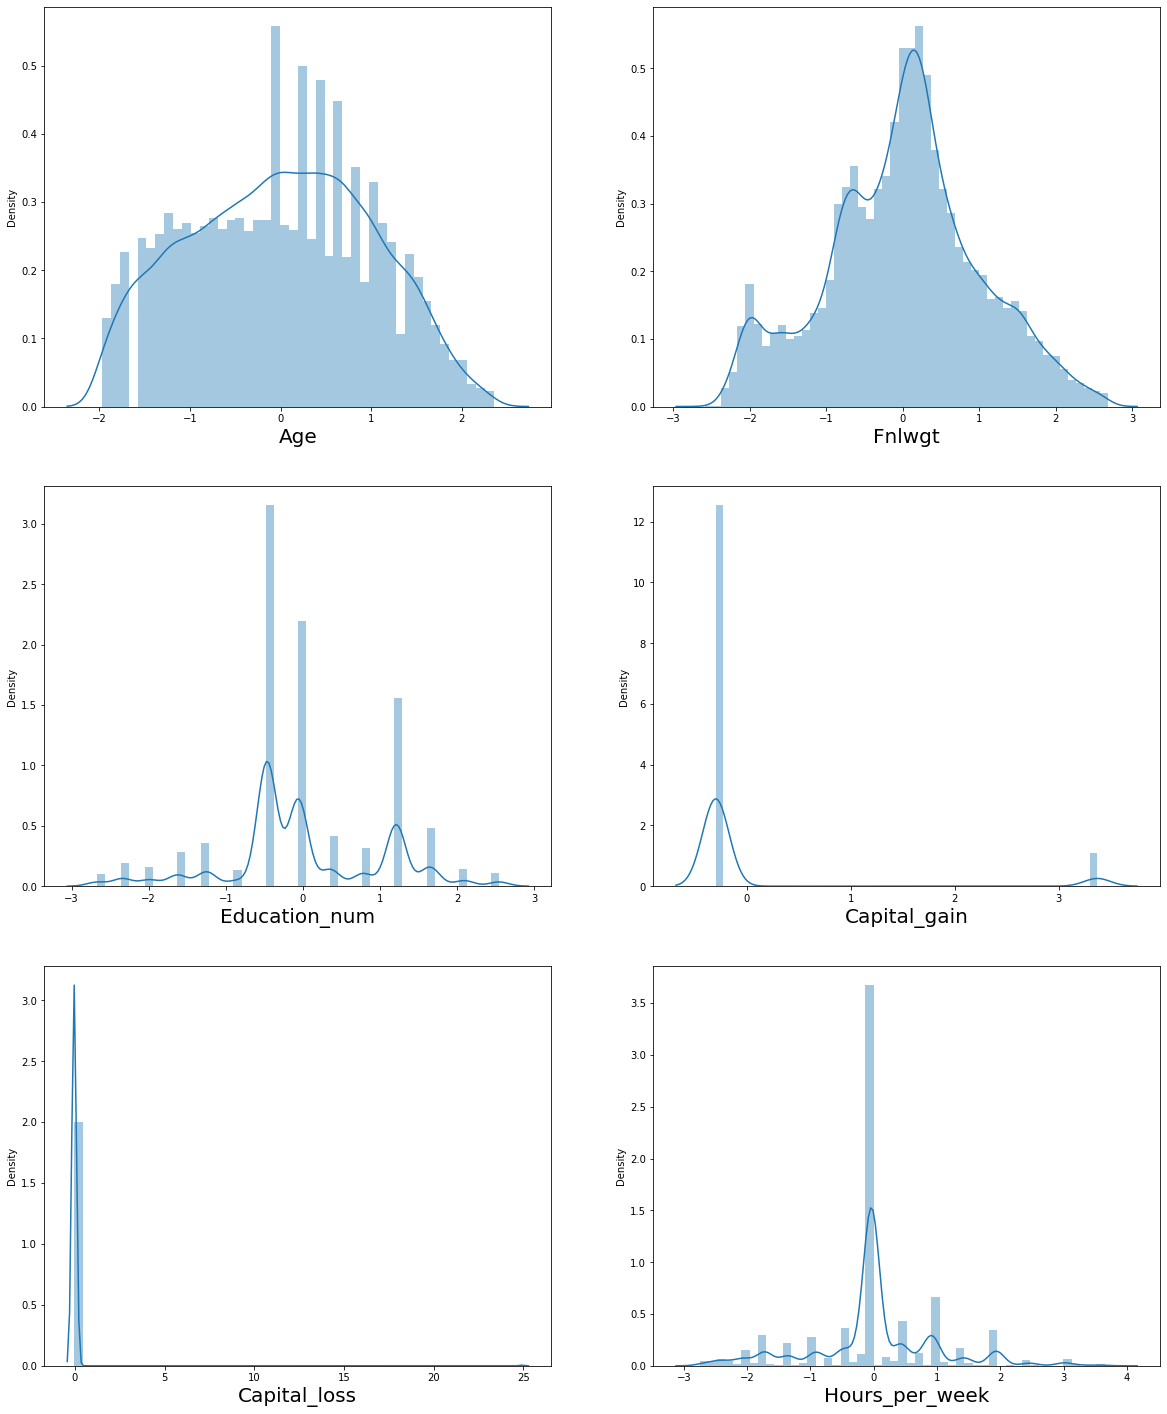

In [462]:
# Let's see how data is distributed for every column
plt.figure(figsize=(20,25))
plotnumber = 1

for column in df_new:
    if plotnumber <=6: # as there are 16 columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Encoding the categorical columns


In [463]:
from category_encoders import BinaryEncoder

bi_enc = BinaryEncoder()

bi_enc = BinaryEncoder(cols=['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']).fit(categorical_col)

cat_enc = bi_enc.transform(categorical_col)

In [464]:
cat_enc

,Workclass_0,Workclass_1,Workclass_2,Workclass_3,Education_0,Education_1,Education_2,Education_3,Marital_status_0,Marital_status_1,...,Race_2,Sex_0,Sex_1,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5,Income
0,0,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,<=50K
1,0,0,1,0,0,0,1,0,0,1,...,1,0,1,0,0,0,0,0,1,<=50K
2,0,0,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,<=50K
3,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,<=50K
4,0,0,1,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,1,0,0,1,1,0,0,0,...,1,1,0,0,0,0,0,0,1,<=50K
32556,0,0,1,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,>50K
32557,0,0,1,0,0,0,1,0,1,1,...,1,1,0,0,0,0,0,0,1,<=50K
32558,0,0,1,0,0,0,1,0,1,0,...,1,0,1,0,0,0,0,0,1,<=50K


In [465]:
#categorical_col = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
cat_enc['Income'] = lbl.fit_transform(cat_enc['Income'])
#cat_enc['Income'] = cat_enc['Income'].apply(lbl.fit_transform)

In [466]:
cat_enc

,Workclass_0,Workclass_1,Workclass_2,Workclass_3,Education_0,Education_1,Education_2,Education_3,Marital_status_0,Marital_status_1,...,Race_2,Sex_0,Sex_1,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5,Income
0,0,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,...,1,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,1,0,0,1,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
32556,0,0,1,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,1
32557,0,0,1,0,0,0,1,0,1,1,...,1,1,0,0,0,0,0,0,1,0
32558,0,0,1,0,0,0,1,0,1,0,...,1,0,1,0,0,0,0,0,1,0


<AxesSubplot:>

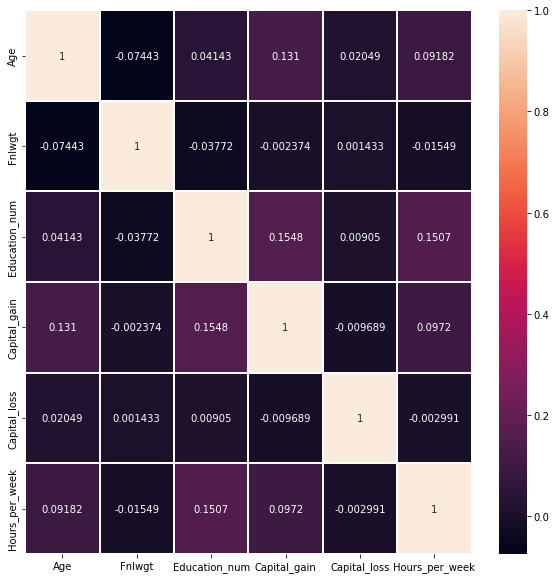

In [468]:
# Visualizing correlation between dependent and independent variables by using heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(numerical_col.corr(), linewidths = 0.1, fmt = ".4g", annot = True)

In [469]:
numerical_col.shape

(29808, 6)

In [470]:
cat_enc.shape

(29808, 30)

In [471]:
final_data = pd.concat([numerical_col.reset_index(drop=True), cat_enc.reset_index(drop=True)], axis=1)

In [472]:
final_data.shape

(29808, 36)

# separating features and target

In [473]:
x = final_data.drop('Income', axis = 1)
y = final_data['Income']

In [474]:
numerical_col.skew()

Age                0.491125
Fnlwgt             0.635160
Education_num     -0.169811
Capital_gain       4.941892
Capital_loss      25.757548
Hours_per_week    -0.353124
dtype: float64

We have scaled the data using Standard Scaler method to overcome the issue of data biasness.

In [475]:
y.value_counts()

0    23156
1     6652
Name: Income, dtype: int64

## Oversampling

In [476]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [477]:
y.value_counts()


0    23156
1    23156
Name: Income, dtype: int64

In [478]:
# Checking the dataframe after preprocessing and data cleaning.
final_data.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_0,Workclass_1,Workclass_2,Workclass_3,...,Race_2,Sex_0,Sex_1,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5,Income
0,50,83311,13,0,0.0,13,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
1,38,215646,9,0,0.0,40,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
2,53,234721,7,0,0.0,40,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,28,338409,13,0,0.0,40,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,37,284582,14,0,0.0,40,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0


## Creating train_test_split


In [479]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.30)


## Scaling the Data

In [484]:
from sklearn.preprocessing import StandardScaler

#list for cols to scale
cols_to_scale = ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

#create and fit scaler
scaler = StandardScaler()
scaler.fit(x_train[cols_to_scale])

#scale selected data
x_train[cols_to_scale] = scaler.transform(x_train[cols_to_scale])

## Classification Algorithms

In [485]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

In [486]:
# checking accuracy_score for DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
predDTC = DTC.predict(x_test)
print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test, predDTC))

0.733482078595077
[[5507 1409]
 [2294 4684]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6916
           1       0.77      0.67      0.72      6978

    accuracy                           0.73     13894
   macro avg       0.74      0.73      0.73     13894
weighted avg       0.74      0.73      0.73     13894



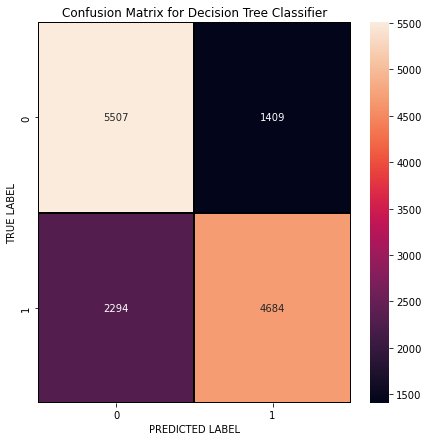

In [491]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test, predDTC)
#x_axis_labels = ["0", "1"]
#y_axis_labels = ["0", "1"]
f,ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

In [487]:
# Checking accuracy_score for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8208579242838635
[[5300 1616]
 [ 873 6105]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      6916
           1       0.79      0.87      0.83      6978

    accuracy                           0.82     13894
   macro avg       0.82      0.82      0.82     13894
weighted avg       0.82      0.82      0.82     13894



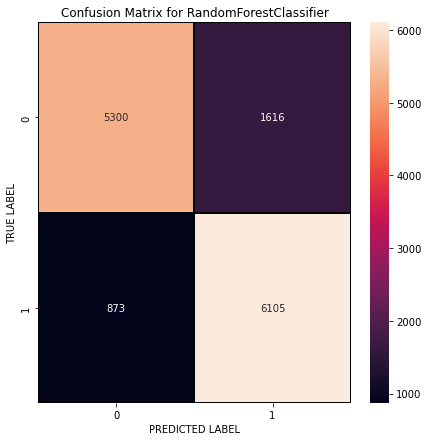

In [492]:
# Lets plot confusion matrix for RFC
cm = confusion_matrix(y_test, predRFC)
#x_axis_labels = ["0", "1"]
#y_axis_labels = ["0", "1"]
f,ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for RandomForestClassifier")
plt.show()

In [488]:
# Checking accuracy_score for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.5022311789261552
[[   0 6916]
 [   0 6978]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6916
           1       0.50      1.00      0.67      6978

    accuracy                           0.50     13894
   macro avg       0.25      0.50      0.33     13894
weighted avg       0.25      0.50      0.34     13894



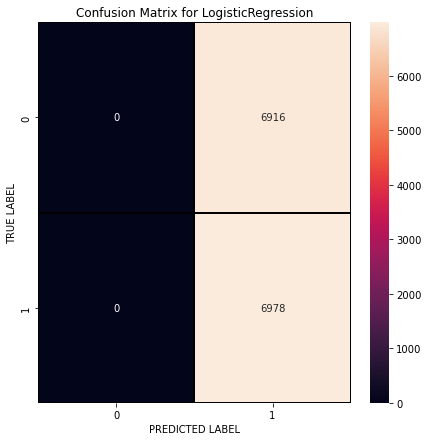

In [493]:
# Lets plot confusion matrix for LogisticRegression
cm = confusion_matrix(y_test, predLR)
#x_axis_labels = ["0", "1"]
#y_axis_labels = ["0", "1"]
f,ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for LogisticRegression")
plt.show()

In [489]:
# checking accuracy_score for KNeighborsClassifier
knn = KNN()
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.5022311789261552
[[   0 6916]
 [   0 6978]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6916
           1       0.50      1.00      0.67      6978

    accuracy                           0.50     13894
   macro avg       0.25      0.50      0.33     13894
weighted avg       0.25      0.50      0.34     13894



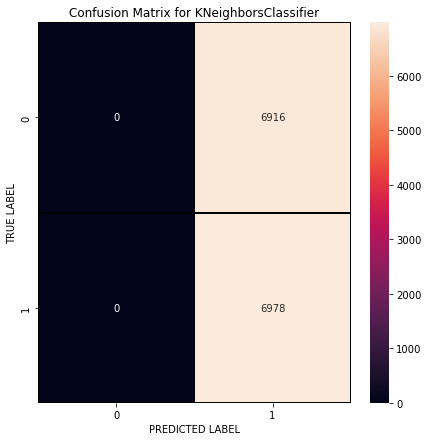

In [494]:
# Lets plot confusion matrix for KNeighborsClassifier
cm = confusion_matrix(y_test, predknn)
#x_axis_labels = ["0", "1"]
#y_axis_labels = ["0", "1"]
f,ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for KNeighborsClassifier")
plt.show()

In [490]:
# Checking accuracy_score for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.7860227436303441
[[4333 2583]
 [ 390 6588]]
              precision    recall  f1-score   support

           0       0.92      0.63      0.74      6916
           1       0.72      0.94      0.82      6978

    accuracy                           0.79     13894
   macro avg       0.82      0.79      0.78     13894
weighted avg       0.82      0.79      0.78     13894



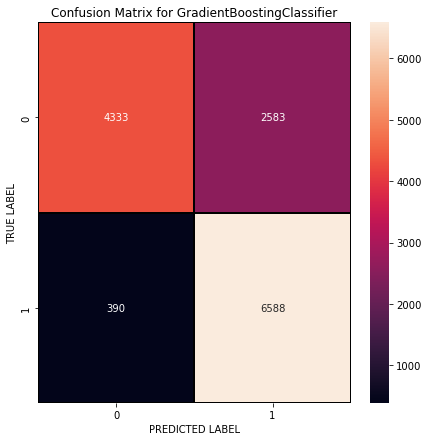

In [495]:
# Lets plot confusion matrix for GradientBoostingClassifier
cm = confusion_matrix(y_test, predGB)
#x_axis_labels = ["0", "1"]
#y_axis_labels = ["0", "1"]
f,ax = plt.subplots(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for GradientBoostingClassifier")
plt.show()

## Checking the validation score

In [496]:
from sklearn.model_selection import cross_val_score


In [497]:
# CV score for Decision Tree Classifier
print(cross_val_score(DTC, x, y, cv = 5).mean())

0.8508844113007281


In [498]:
# CV score for Random Forest Classifier
print(cross_val_score(RFC, x, y, cv = 5).mean())

0.8823454243941289


In [499]:
# CV score for Logistic Regression
print(cross_val_score(LR, x, y, cv = 5).mean())

0.5870833623078078


In [500]:
# CV score for KNN Classifier
print(cross_val_score(knn, x, y, cv = 5).mean())

0.7203537859670359


In [501]:
# CV score for Gradient Boosting Classifier
print(cross_val_score(GB, x, y, cv = 5).mean())

0.8848496861770112


The difference between the accuracy score and the CV score of RandomForestClassifier is least i.e 6 percent. So, we can conclude that RandomForestClassifier as best fitting model.

## Hyperparameter Tuning


In [502]:
from sklearn.model_selection import GridSearchCV


In [503]:
# RandomForestClassifier
parameters = {'criterion':["gini", "entropy"],
             'max_features':['auto', 'sqrt', 'log2'],
             'max_depth':[10, 20, 30, 40, 50],
             "min_samples_leaf":[2, 3, 4, 5, 6]}

In [504]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv = 5)


In [505]:
GCV.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6]})

In [506]:
GCV.best_params_


{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2}

In [507]:
census = RandomForestClassifier(criterion = 'entropy', max_depth = 30, max_features = 'sqrt', min_samples_leaf = 2)
census.fit(x_train, y_train)
pred = census.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

83.89952497480927


## Plotting ROC and compare AUC for all the models used


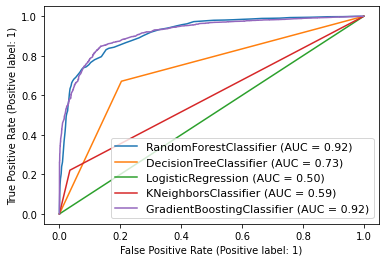

In [508]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(RFC, x_test, y_test)
plot_roc_curve(DTC, x_test, y_test, ax = disp.ax_) 
plot_roc_curve(LR, x_test, y_test, ax = disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax = disp.ax_)

plt.legend(prop={'size': 11}, loc = 'lower right')
plt.show()

## Plotting ROC and Compare AUC for the best model


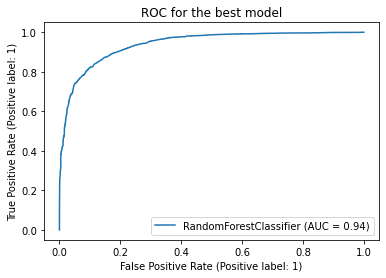

In [509]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(census, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

The AUC for best model is 0.94

## Saving The Model


In [510]:
# Saving the model using .pkl
import joblib
joblib.dump(census,"Census Income Prediction.pkl")

['Census Income Prediction.pkl']

In [511]:
# Loading the saved model
model = joblib.load("Census Income Prediction.pkl")

## Predicting the saved model


In [512]:
a = np.array(y_test)
predicted = np.array(model.predict(x_test))
df_final = pd.DataFrame({'Original' : a, 'Predicted' : predicted}, index = range(len(a)))
df_final

,Original,Predicted
0,1,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
13889,0,0
13890,0,0
13891,0,0
13892,1,1
